## Multiple Linear Regression

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data = pd.read_csv('data/doggy-illness.csv', delimiter="\t")
data.head()

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53


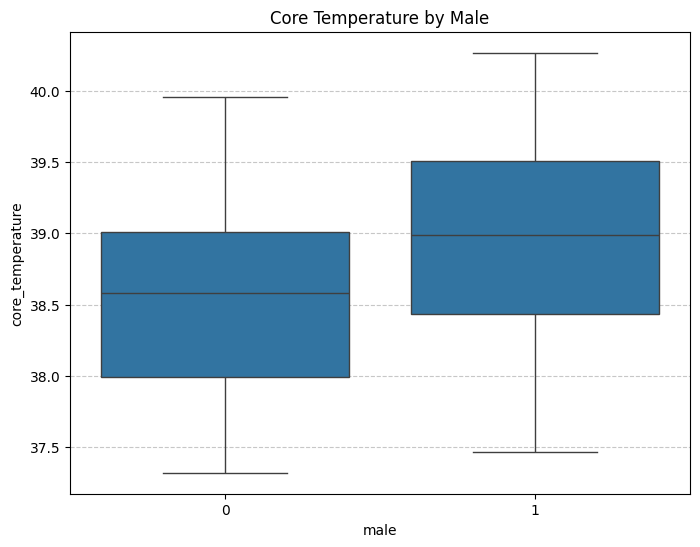

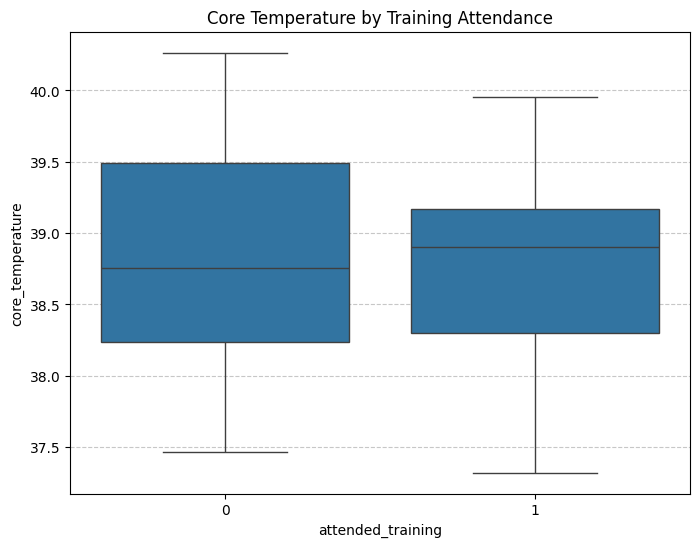

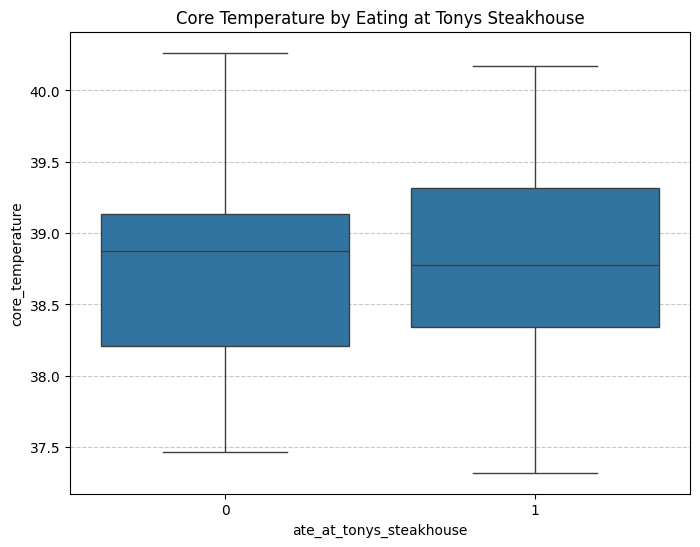

In [6]:
def box_and_whisker(data, x_column, y_column, title=None):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data, x=x_column, y=y_column,)
    plt.title(title or f'{y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def scatter2D(data, x_column, y_column, title=None):
    plt.figure(figsize=(8,6))
    plt.scatter(data[x_column], data[y_column], alpha=0.7)
    plt.title(title or f'{y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

box_and_whisker(data, 'male', 'core_temperature', 'Core Temperature by Male')
box_and_whisker(data, 'attended_training', 'core_temperature', 'Core Temperature by Training Attendance')
box_and_whisker(data, 'ate_at_tonys_steakhouse', 'core_temperature', 'Core Temperature by Eating at Tonys Steakhouse')


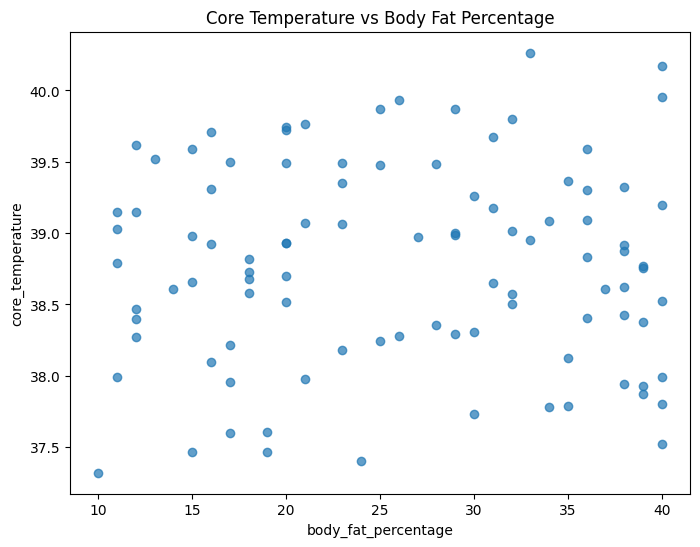

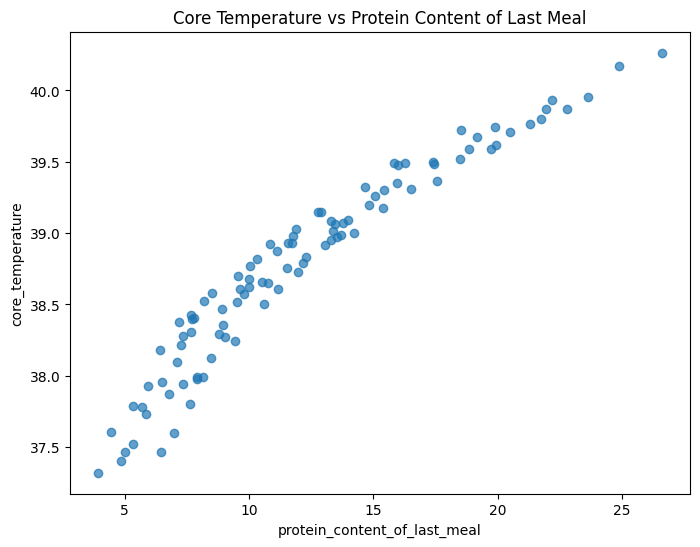

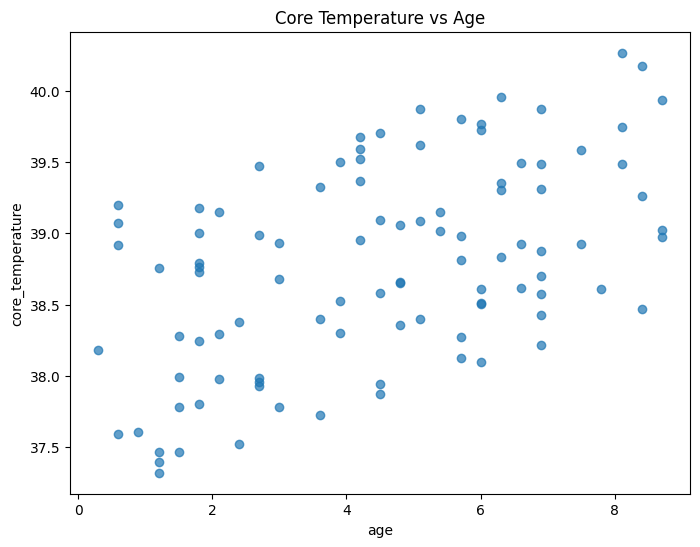

In [8]:
scatter2D(data, "body_fat_percentage", "core_temperature", "Core Temperature vs Body Fat Percentage")
scatter2D(data, "protein_content_of_last_meal", "core_temperature", "Core Temperature vs Protein Content of Last Meal")
scatter2D(data, "age", "core_temperature", "Core Temperature vs Age")

## Simple Linear Regression

male
R-Squared:  0.09990074430719931


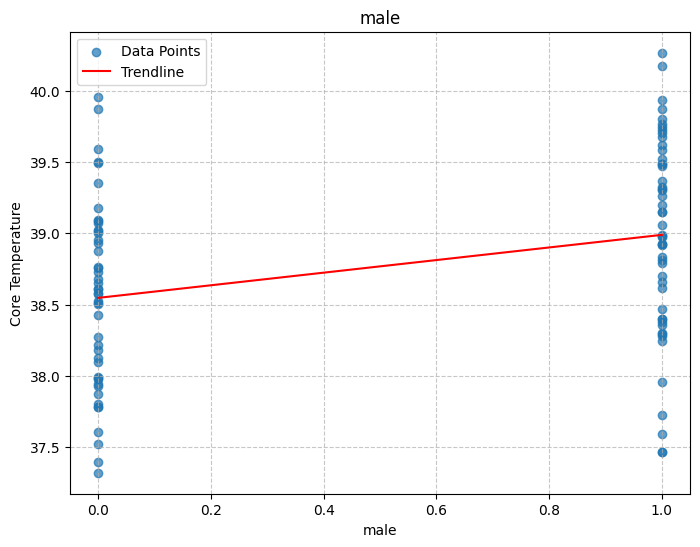

age
R-Squared:  0.2648116081342463


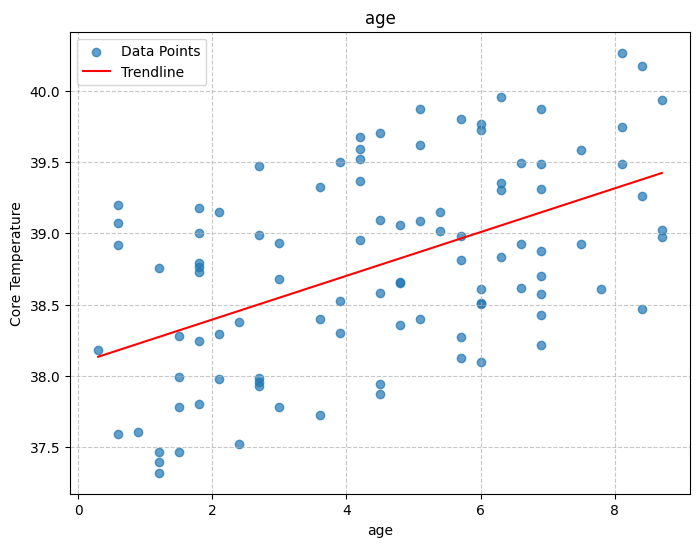

protein_content_of_last_meal
R-Squared:  0.9155158150005704


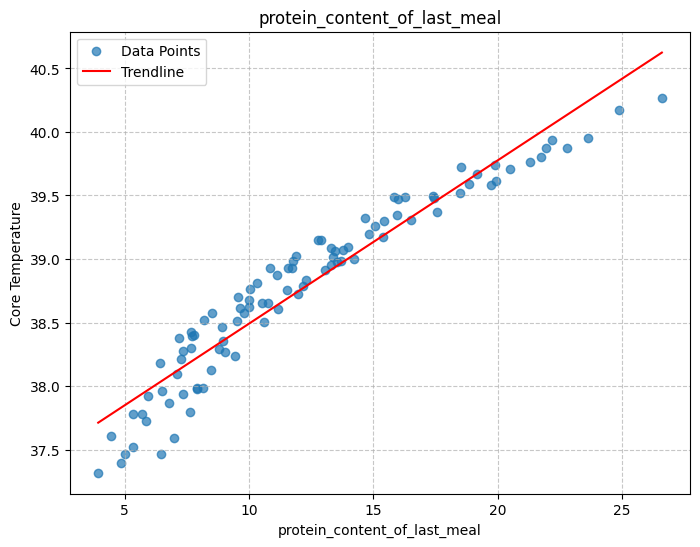

body_fat_percentage
R-Squared:  0.000208090026378005


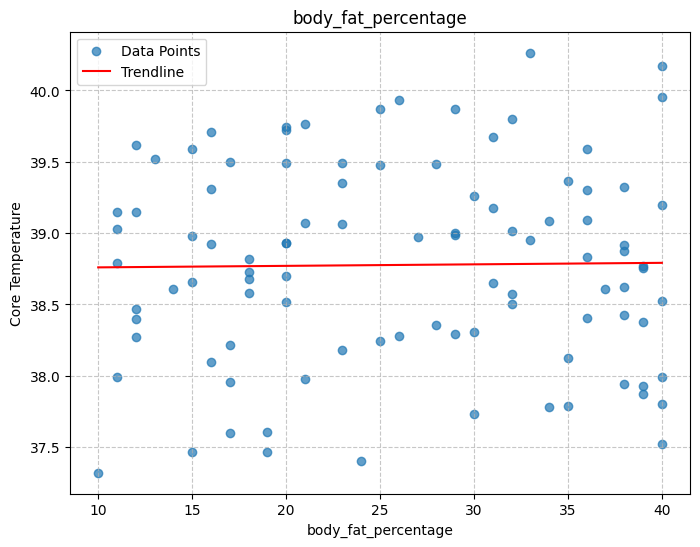

In [14]:
for feature in ["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]:
    formula = "core_temperature ~ " + feature
    simple_model = smf.ols(formula=formula, data=data).fit()

    print(feature)
    print("R-Squared: ", simple_model.rsquared)

    plt.figure(figsize=(8,6))
    plt.scatter(data[feature], data["core_temperature"], alpha=0.7, label='Data Points')

    x = np.linspace(data[feature].min(), data[feature].max(), 100)
    y = simple_model.params[1] * x + simple_model.params[0]
    plt.plot(x, y, color = 'red', label = 'Trendline')

    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Core Temperature')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

naive R-squared:  0.0
trained R-squared  0.2648116081342463


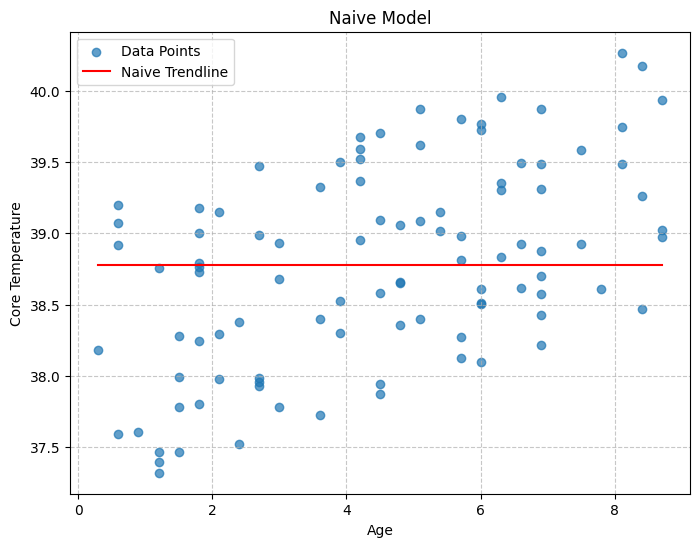

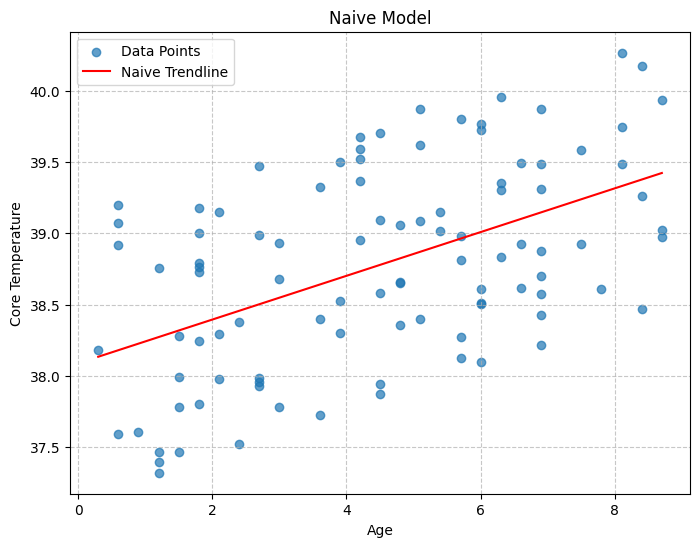

In [18]:
formula = "core_temperature ~ age"
age_trained_model = smf.ols(formula=formula, data=data).fit()
age_naive_model = smf.ols(formula=formula, data=data).fit()
age_naive_model.params[0] = data['core_temperature'].mean()
age_naive_model.params[1] = 0

print("naive R-squared: ", age_naive_model.rsquared)
print("trained R-squared ", age_trained_model.rsquared)

#Naive Model
plt.figure(figsize=(8,6))
plt.scatter(data['age'], data['core_temperature'], alpha=0.7, label='Data Points')
plt.plot(
    np.linspace(data['age'].min(), data['age'].max(), 100),
    [data['core_temperature'].mean()] * 100,
    color = 'red', label='Naive Trendline')
plt.title("Naive Model")
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Trained Model
plt.figure(figsize=(8,6))
plt.scatter(data['age'], data['core_temperature'], alpha=0.7, label='Data Points')
plt.plot(
    np.linspace(data['age'].min(), data['age'].max(), 100),
    age_trained_model.params[1] * np.linspace(data['age'].min(), data['age'].max(), 100) + age_trained_model.params[0],
    color = 'red', label='Naive Trendline')
plt.title("Naive Model")
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Multiple Linear Regression

In [22]:
model = smf.ols(formula="core_temperature ~ age + male", data=data).fit()
print("R-squared: ", model.rsquared)

R-squared:  0.3148512699768006


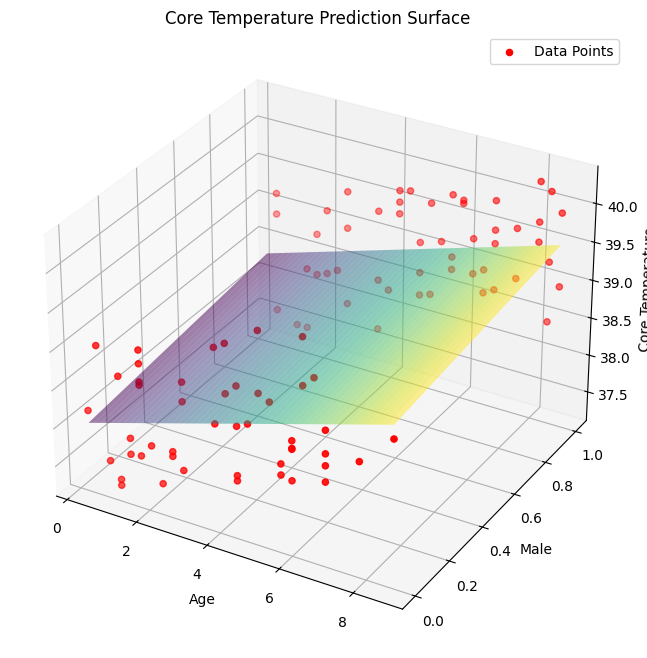

In [24]:
def predict(age, male, model):
    df = pd.DataFrame(dict(age=age, male=male))
    return model.predict(df)

#Prepare the 3D surface data
x_values = np.linspace(data.age.min(), data.age.max(), 50)
y_values = np.array([0,1])
X, Y = np.meshgrid(x_values, y_values)
Z = predict(X.flatten(), Y.flatten(), model).to_numpy().reshape(X.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')

ax.scatter(data.age, data.male, data.core_temperature, color = 'r', label='Data Points')

ax.set_title("Core Temperature Prediction Surface")
ax.set_xlabel("Age")
ax.set_ylabel("Male")
ax.set_zlabel("Core Temperature")
ax.legend()

plt.show()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.83
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.58e-08
Time:                        16:45:24   Log-Likelihood:                -85.295
No. Observations:                  98   AIC:                             176.6
Df Residuals:                      95   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9793      0.135    282.094      0.000      37.712      38.247
age            0.1406      0.026      5.459      0.000       0.089       0.192
male           0.3182      0.121      2.634      0.010       0.078       0.558
==============================================================================
Omnibus:                       21.610   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.227
Skew:                           0.121   Prob(JB):                       0.0733
Kurtosis:                       1.895   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
age_trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       core_temperature   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     34.58
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           5.94e-08
Time:                        16:48:01   Log-Likelihood:                -88.749
No. Observations:                  98   AIC:                             181.5
Df Residuals:                      96   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0879      0.132    288.373      0.000      37.826      38.350
age            0.1533      0.026      5.880      0.000       0.102       0.205
==============================================================================
Omnibus:                       43.487   Durbin-Watson:                   2.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.605
Skew:                           0.087   Prob(JB):                       0.0368
Kurtosis:                       1.740   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""